# **Class Assignment: Inference on Regression Parameters (20 points)**

#### **Meg Bucich**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>

The goal of this assignment is to code all aspects of parameter inference for simple linear regression by hand (in R).

By the end of the assignment, you will know how to calculate the majority of information provided by R's regression summary!

1. We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  Run the following command to view the `mtcars` dataset

    `head(mtcars)`

2. How many rows are in `mtcars`? (use `nrow()`)

3. How many columns are in `mtcars`? (use `ncol()`)

4. We are interested in investigating the relationship between vehicle quarter mile time in seconds `qsec` and vehicle weight in thousands of pounds `wt`.

  * Plot a scatterplot with `qsec` on the y-axis and `wt` on the x-axis. Does there appear to be a relationship between `qsec` and `wt`? Explain your observations in complete sentences.

In [1]:
#1
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
#2
nrow(mtcars)

[1] 32

In [4]:
#3
ncol(mtcars)

[1] 11

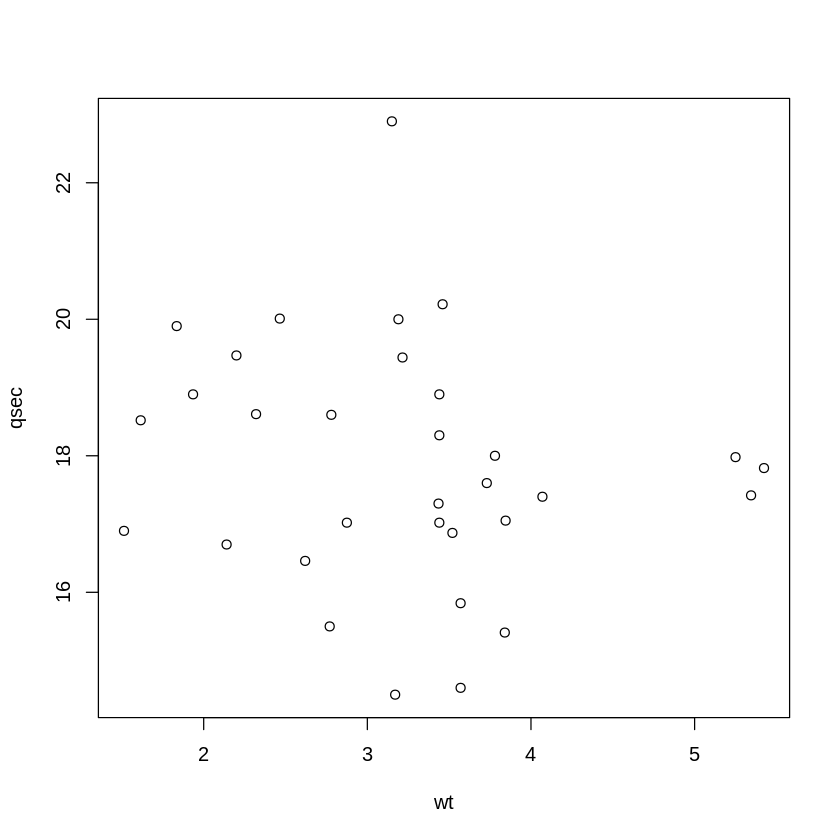

In [6]:
#4
qsec = mtcars$qsec
wt = mtcars$wt
plot(wt,qsec)

at a glance, it does not look like there is much of a relationship between wt and qsec. Mulitple weight values have the same qsec values and there doesn't seem to be a trend in either the positive or negative direction.

<br>

---

<br>






####<font color=red>Task 2</font>

1. Regress `qsec` (y-variable) on `wt` (x-variable) using `lm()` and store as `fit`. Show the regression `summary()`.

2. Extract the slope value from the regression and store as `beta1hat`:

    `beta1hat <- fit$coefficients[2]`

  Confirm that you have extracted the appropriate value.

3. Calculate the estimate for the error variance as store as `s2`. This should be the same value as the residual standard error squared from the regression summary (1.789^2).

<center> $s^2 = \frac{1}{n-2} \sum_i \left(Y_i - \hat{Y_i}\right)^2$
</center>


4. Calculate the estimate for the variance of $\hat{\beta}_1$ and store as `beta1hat_var`. Verify your answer with the regression summary.

<center> $\widehat{Var(\hat{\beta}_1)} = \frac{s^2}{\sum_i (X_i - \bar{X})^2}$
</center>

In [8]:
#1
fit = lm(qsec ~ wt, data = mtcars)
summary(fit)


Call:
lm(formula = qsec ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389


In [10]:
#2
beta1hat = fit$coefficients[2]
beta1hat

wt 
-0.3190812

<center> $s^2 = \frac{1}{n-2} \sum_i \left(Y_i - \hat{Y_i}\right)^2$
</center>

In [33]:
num = sum((qsec - fit$fitted.values)^2)
denom = nrow(mtcars) - 2
s2 = num / denom
s2
sqrt(s2)

[1] 3.198882

[1] 1.788542

<center> $\widehat{Var(\hat{\beta}_1)} = \frac{s^2}{\sum_i (X_i - \bar{X})^2}$
</center>

In [36]:
#4
num = s2
denom = sum((wt - mean(wt))^2)
beta1hat_var = num / denom
beta1hat_var
sqrt(beta1hat_var)

[1] 0.1077836

[1] 0.3283041

<br>

---

<br>






####<font color=red>Task 3</font>

You now have the slope estimate $\hat{\beta}_1$ and the variance of the slope estimate $Var(\hat{\beta}_1)$. We can now conduct statistical inference (by hand).

1. By hand (in R), calculate a 95% confidence interval for the slope. Use `qt()` to determine your critical values on the t-distribution.

2. Compare your 95% confidence interval to the built-in function in R (`confint(fit)`).

3. What is the interpretation of your 95% confidence interval?

4. Is the slope significantly different from 0? Explain your reasoning.
    
    What does this mean in the context of the relationship between vehicle quarter mile time and vehicle weight?

5. Calculate a 20% confidence interval and verify using `confint(fit, level = 0.20)`. [Note 20% CIs are never usually calculated!]. Based on your 20% confidence interval, is the slope significantly different from 0? Explain why you observe this result.

In [50]:
#1
se = sqrt(beta1hat_var)
alpha = 0.05
degrees_freedom = nrow(mtcars) - 2
critical_value = qt(1 - alpha/2, degrees_freedom)
lower = beta1hat - critical_value * se
upper = beta1hat + critical_value * se
print(c(lower,upper))

        wt         wt 
-0.9895677  0.3514053 


In [40]:
#2
confint(fit)

,2.5 %,97.5 %
(Intercept),16.6236212,21.1270067
wt,-0.9895677,0.3514053


In [ ]:
#3

We are 95% sure that the true population slope is in the interval (-.9895677,.3514053)

In [ ]:
#4

Since zero falls in our C.I., we cannot say that the slope is significantly different from zero at an alpha level of .05.
This means that the quarter mile time and the vechile weight are not correlated.

In [42]:
#5
confint(fit,level = .20)

,40 %,60 %
(Intercept),18.5934981,19.1571298
wt,-0.4029975,-0.2351649


Now, zero does not fall in this C.I. so we can be 20% sure that the true population slope is different from zero.

<br>

---

<br>






####<font color=red>Task 4</font>

T-values and p-values by hand.

1. We are interested in determining if the slope is significantly different from 0. Write the null and alternative hypotheses for this test.

2. What is your t-statistic? Verify your answer with the regression summary.

3. What is the p-value associated with your t-statistic? Verify your answer with the regression summary.

4. Determine if the slope is significantly different from zero at the 5% Type I error level. What is your conclusion in the context of the application? Explain your answer.

In [ ]:
#1

$H_{0}$ : $\beta_{1} = 0$\
$H_{a}$ : $\beta_{1} \neq 0$

In [ ]:
#2

In [45]:
t_stat = beta1hat / se
t_stat
summary(fit)

wt 
-0.9719073


Call:
lm(formula = qsec ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389


In [53]:
#3
p_value = 2 * pt(abs(t_stat), degrees_freedom, lower.tail = FALSE)
print(p_value)
summary(fit)


       wt 
0.3388683 



Call:
lm(formula = qsec ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389


In [ ]:
#4

our alpha value is large which means we have a 33% chance of making a type 1 error. This means we fail to reject the null. there is not enough evidence to say that the true population slope is significantly different from zero.


<br>

---

<br>






####<font color=red>Task 5</font>

T-values and p-values by hand.

1. We are interested in determining if the slope is significantly different from 0.5. Write the null and alternative hypotheses for this test.

2. What is your t-statistic? [answer: -2.49]

3. What is the p-value associated with your t-statistic? [answer: 0.02]

4. Determine if the slope is significantly different from 0.5 at the 5% Type I error level. What is your conclusion in the context of the application? Explain your answer.

In [ ]:
#1

$H_{0}$ : $\beta_{1} = .5$\
$H_{a}$ : $\beta_{1} \neq .5$

In [55]:
#2
t_stat = (beta1hat - .5) / se
t_stat

wt 
-2.494885

In [56]:
#3
p_value = 2 * pt(abs(t_stat), degrees_freedom, lower.tail = FALSE)
print(p_value)

        wt 
0.01833223 


In [ ]:
#4

our alpha is smaller than .05 so we can reject the null. This means there is enough evidence to conclude that the true population slope is significantly different than zero. Meaning we have a 2% chance of making a type 1 error.

<br>


---



---



## **Distribution of Regression Parameters**


####<font color=red>Task 1</font>

The code below simulates a population dataset called `sim`, which contains an `x` predictor variable and `y` response variable. The population data has the following attributes

  *   When regressing `y` on `x`, the true slope is 2
  *   When regressing `y` on `x`, the true intercept is 1
  *   True errors are normally distributed with mean 0 and variance ###

  Note that the true population information is not typically known. This is to illustrate sampling variability in regression.

<br>

Copy and paste the code below in a code cell and run.

<br>

```
#############################################
#### Code to create simulated population ####
#############################################

# population size
N <- 1000000

# ignore
set.seed(1)

# create a synthetic population
beta0true <- 1          # true population intercept      
beta1true <- 2          # true population slope
error     <- rnorm(N)   # random statistical error

x <- sample(1:100, N,   # true population x values
            replace = TRUE)

# true population regression
y <- beta0true + beta1true * x + error

# create true population dataset
sim <- data.frame(x, y)
```

<br>

In [3]:
# population size
N <- 1000000

# ignore
set.seed(1)

# create a synthetic population
beta0true <- 1          # true population intercept
beta1true <- 2          # true population slope
error     <- rnorm(N)   # random statistical error

x <- sample(1:100, N,   # true population x values
            replace = TRUE)

# true population regression
y <- beta0true + beta1true * x + error

# create true population dataset
sim <- data.frame(x, y)

<br>


---



####<font color=red>Task 2</font>

1. The following code takes a random sample of size `n = 10` of the population and stores the dataset as a variable called `sample_1`. Run the code in the cell block below.

```
set.seed(1)  # ignore

#############################################
############ First Random Sample ############
#############################################

# sample size
n <- 10

# random sample from population
sample_1 <- sim[sample(1:N, n, replace = FALSE),]

```

<br>

2. Using `lm()` and the `sample_1` dataset, fit a simple linear regression using `y` as the response and `x` as the predictor and store as `fit_1`.
  
  Show the summary using `summary()`.

<br>

3. The following code takes another random sample of size `n = 10` of the population and stores the dataset as a variable called `sample_2`. Run the code in the cell block below.

```
set.seed(30)  # ignore

############################################
########### Second Random Sample ###########
############################################

# sample size
n <- 10

# random sample from population
sample_2 <- sim[sample(1:N, n, replace = FALSE),]

```

<br>

4. Using `lm()` and the `sample_2` dataset, fit a simple linear regression using `y` as the response and `x` as the predictor and store as `fit_2`.
  
  Show the summary using `summary()`.

<br>

5. Why aren't the slope estimates from the two samples the same? Explain you answer in complete sentences.

<br>

6. Are the slopes estimates from the two samples close to the true population slope of 2? Explain your answer in complete sentences.

In [58]:
#1
set.seed(1)  # ignore

#############################################
############ First Random Sample ############
#############################################

# sample size
n <- 10

# random sample from population
sample_1 <- sim[sample(1:N, n, replace = FALSE),]


In [64]:
#2
x = sample_1$x
y = sample_1$y
fit_1 = lm(y~x, data = sample_1)
summary(fit_1)


Call:
lm(formula = y ~ x, data = sample_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1134 -0.4319  0.1653  0.5061  1.2403 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08143    0.69049   1.566    0.156    
x            2.00142    0.01771 112.992 4.21e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.048 on 8 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 1.277e+04 on 1 and 8 DF,  p-value: 4.206e-14


In [62]:
#3
set.seed(30)  # ignore

############################################
########### Second Random Sample ###########
############################################

# sample size
n <- 10

# random sample from population
sample_2 <- sim[sample(1:N, n, replace = FALSE),]

In [65]:
#4
x = sample_2$x
y = sample_2$y
fit_2 = lm(y~x, data = sample_2)
summary(fit_2)


Call:
lm(formula = y ~ x, data = sample_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23915 -0.66399  0.04475  0.47895  1.40567 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.60147    0.75325   2.126   0.0662 .  
x            1.98442    0.01438 137.974 8.52e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9423 on 8 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic: 1.904e+04 on 1 and 8 DF,  p-value: 8.515e-15


In [ ]:
#5

The slope estimates are not the same because we are looking at two different random samples, which allows us to infer things about the whole population. The parameter estimates will vary for small sample sizes because it only explains a small portion of the data. This is why two small samples yield different estimates.

In [ ]:
#6

Yes they are close to the true population slope of 2. Sample 1 gives us an estimate of 2.00142 and sample 2 gives us an estimate of 1.98442. Safe to say that these are close enough to each other as well as the true estimate

<br>


---



####<font color=red>Task 3</font>


1. The code below randomly samples the population, regresses y on x, and stores the `intercepts` and `slopes` **1000 times**.
  
  Run the code in the cell block below.

```
set.seed(2)  # ignore

# sample size
n <- 10

intercepts <- c()
slopes     <- c()
for (i in 1:1000) {

  # random sample from population
  samp <- sim[sample(1:N, n, replace = FALSE),]

  # regression on random sample
  fit <- lm(y ~ x, data = samp)

  # store intercept and slope
  intercepts[i] <- fit$coefficients[1]
  slopes[i]     <- fit$coefficients[2]
}
```

<br>

2. Calculate the mean of the `slopes` variable using `mean()` (i.e. calculate $E(\hat{\beta}_1)$). How does this compare to the true mean of $\beta = 2$?

<br>

3. Plot a histogram of the slopes using the code below. Does the distribution appear normal?

In [4]:
#1
set.seed(2)  # ignore

# sample size
n <- 10

intercepts <- c()
slopes     <- c()
for (i in 1:1000) {

  # random sample from population
  samp <- sim[sample(1:N, n, replace = FALSE),]

  # regression on random sample
  fit <- lm(y ~ x, data = samp)

  # store intercept and slope
  intercepts[i] <- fit$coefficients[1]
  slopes[i]     <- fit$coefficients[2]
}

In [5]:
#2
mean(slopes)

[1] 2.000108

very good approximation of the true mean of $\beta$

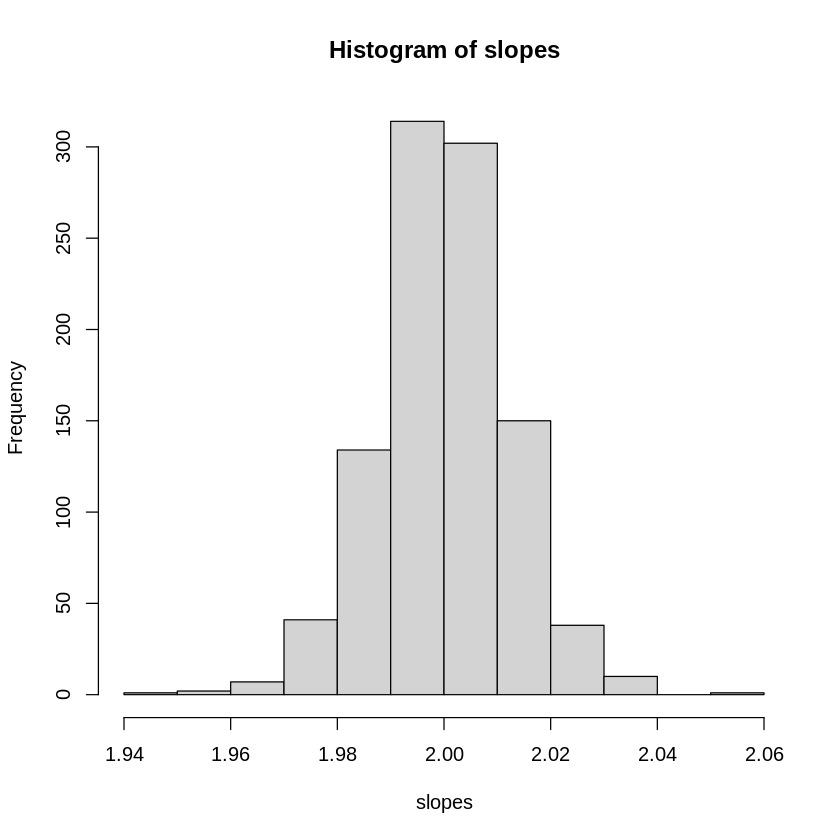

In [6]:
#3
hist(slopes)

it looks pretty normal to me, with a mean of 2, which is what we calcuated.

<br>


---

